In [1]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from denoising.data import SIDD

In [2]:
path = "../datasets/SIDD_small/"
batch_size = 4
dataset = SIDD(root_dir = path)
loader = DataLoader(dataset, batch_size = batch_size, shuffle = True)

In [3]:
noisy_batch, clean_batch = next(iter(loader))

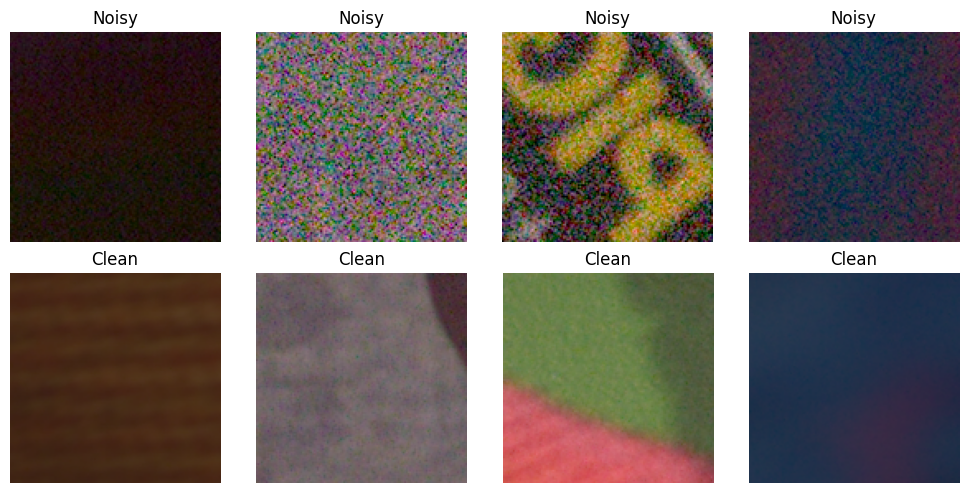

In [4]:
n_examples = batch_size
fig, axs = plt.subplots(2, n_examples, figsize=(10, 5))
for i in range(n_examples):
    axs[0, i].imshow(noisy_batch[i].permute(1, 2, 0))
    axs[0, i].set_title("Noisy")
    axs[0, i].axis('off')

    axs[1, i].imshow(clean_batch[i].permute(1, 2, 0))
    axs[1, i].set_title("Clean")
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()

In [5]:
print(f"Noisy min: {noisy_batch.min().item()}, max: {noisy_batch.max().item()}")
print(f"Clean min: {clean_batch.min().item()}, max: {clean_batch.max().item()}")

Noisy min: 0.0, max: 0.9450980424880981
Clean min: 0.04313725605607033, max: 0.8941176533699036


In [6]:
print("Noisy shape:", noisy_batch.shape) #(B, 3, H, W)
print("Clean shape:", clean_batch.shape) #(B, 3, H, W)
print("Dtype:", noisy_batch.dtype) 

Noisy shape: torch.Size([4, 3, 128, 128])
Clean shape: torch.Size([4, 3, 128, 128])
Dtype: torch.float32


In [7]:
diff = torch.mean(torch.abs(noisy_batch - clean_batch), dim=(1,2,3))
print("Mean absolute difference per image:", diff)

Mean absolute difference per image: tensor([0.0991, 0.1224, 0.1875, 0.0555])


In [8]:
dataset_train = SIDD(root_dir=path, mode='train')
a, b = dataset_train[0]
a2, b2 = dataset_train[0]

print(torch.mean(torch.abs(a - a2)))

tensor(0.0480)
